In [1]:
import time
import numpy as np
import pandas as pd

# from scipy import sparse
from scipy.stats.mstats import gmean
from datetime import datetime
# from sklearn import preprocessing
# from scipy.stats import skew, boxcox,boxcox_normmax
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from bayes_opt import BayesianOptimization
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import xgboost as xgb

seed = 1234

# Load Data

In [2]:
train_y = np.ravel(pd.read_csv('../input/' + 'labels_BrandenMurray.csv'))

names = ['low_0','medium_0','high_0',
        'low_1','medium_1','high_1',
        'low_2','medium_2','high_2',
        'low_3','medium_3','high_3',
        'low_4','medium_4','high_4',
        'low_5','medium_5','high_5',
        'low_6','medium_6','high_6',
        'low_7','medium_7','high_7',
        'low_8','medium_8','high_8',
        'low_9','medium_9','high_9']

data_path = "../2ndlast/"
total_col = 0

In [3]:
# RFC 1st level 
file_train      = 'train_blend_RFC_entropy_last_2017-04-21-11-06' + '.csv'
file_test_mean  = 'test_blend_RFC_entropy_mean_last_2017-04-21-11-06' + '.csv'

train_rfc = pd.read_csv(data_path + file_train,      header = None)
test_rfc  = pd.read_csv(data_path + file_test_mean,  header = None)


n_column = train_rfc.shape[1]
total_col += n_column

train_rfc.columns = ['rfc_' + x for x in names[:n_column]]
test_rfc.columns  = ['rfc_' + x for x in names[:n_column]]


print train_rfc.iloc[:5,:3]

print test_rfc.iloc[:5,:3]

   rfc_low_0  rfc_medium_0  rfc_high_0
0   0.355361      0.544070    0.100569
1   0.508303      0.446720    0.044978
2   0.603091      0.349880    0.047029
3   0.616221      0.328639    0.055140
4   0.947230      0.049863    0.002907
   rfc_low_0  rfc_medium_0  rfc_high_0
0   0.288217      0.532268    0.179515
1   0.970891      0.025801    0.003308
2   0.908912      0.078535    0.012553
3   0.400539      0.476918    0.122542
4   0.700470      0.269945    0.029586


In [4]:
# LR 1st level
file_train      = 'train_blend_LR_last_2017-04-21-11-16' + '.csv'
file_test_mean  = 'test_blend_LR_mean_last_2017-04-21-11-16' + '.csv'

train_LR = pd.read_csv(data_path + file_train, header = None)
test_LR  = pd.read_csv(data_path + file_test_mean, header = None)

n_column = train_LR.shape[1]
total_col += n_column

train_LR.columns = ['LR_' + x for x in names[:n_column]]
test_LR.columns  = ['LR_' + x for x in names[:n_column]]

print train_LR.iloc[:5,:3]
print test_LR.iloc[:5,:3]

   LR_low_0  LR_medium_0  LR_high_0
0  0.259359     0.652577   0.088065
1  0.738646     0.234238   0.027115
2  0.396965     0.512991   0.090045
3  0.647052     0.312537   0.040412
4  0.923203     0.072255   0.004543
   LR_low_0  LR_medium_0  LR_high_0
0  0.282172     0.549423   0.168405
1  0.955532     0.040091   0.004377
2  0.925692     0.065197   0.009112
3  0.631038     0.309690   0.059272
4  0.803117     0.187725   0.009158


In [5]:
# ET 1st level
file_train      = 'train_blend_ET_entropy_last_2017-04-21-11-48' + '.csv'
file_test_mean  = 'test_blend_ET_entropy_mean_last_2017-04-21-11-48' + '.csv'

train_ET = pd.read_csv(data_path + file_train,      header = None)
test_ET  = pd.read_csv(data_path + file_test_mean,  header = None)

n_column = train_ET.shape[1]
total_col += n_column

train_ET.columns = ['ET_' + x for x in names[:n_column]]
test_ET.columns  = ['ET_' + x for x in names[:n_column]]

print train_ET.iloc[:5,:3]
print test_ET.iloc[:5,:3]

   ET_low_0  ET_medium_0  ET_high_0
0  0.332903     0.538085   0.129012
1  0.471780     0.454812   0.073408
2  0.582223     0.383893   0.033884
3  0.622462     0.328557   0.048981
4  0.926402     0.064996   0.008602
   ET_low_0  ET_medium_0  ET_high_0
0  0.309822     0.527181   0.162997
1  0.984336     0.014059   0.001605
2  0.956579     0.038080   0.005341
3  0.518490     0.384524   0.096986
4  0.759357     0.210049   0.030594


In [6]:
# KNN 1st level
file_train      = 'train_blend_KNN_uniform_last_2017-04-21-13-53' + '.csv'
file_test_mean  = 'test_blend_KNN_uniform_mean_last_2017-04-21-13-53' + '.csv'


train_KNN = pd.read_csv(data_path + file_train,      header = None)
test_KNN  = pd.read_csv(data_path + file_test_mean,  header = None)


n_column = train_KNN.shape[1]
total_col += n_column

train_KNN.columns      = ['KNN_uniform_' + x for x in names[:n_column]]
test_KNN.columns  = ['KNN_uniform_' + x for x in names[:n_column]]

print train_KNN.iloc[:5,:3]
print test_KNN.iloc[:5,:3]

   KNN_uniform_low_0  KNN_uniform_medium_0  KNN_uniform_high_0
0           0.507812              0.390625            0.101562
1           0.531250              0.359375            0.109375
2           0.671875              0.273438            0.054688
3           0.609375              0.250000            0.140625
4           0.843750              0.140625            0.015625
   KNN_uniform_low_0  KNN_uniform_medium_0  KNN_uniform_high_0
0           0.381250              0.457813            0.160938
1           0.968750              0.031250            0.000000
2           0.970313              0.029687            0.000000
3           0.693750              0.259375            0.046875
4           0.612500              0.321875            0.065625


In [7]:
# TFFM 1st level 0322
file_train      = 'train_blend_FM_BM_0322_2017-03-27-04-35' + '.csv'
file_test_mean  = 'test_blend_FM_mean_BM_0322_2017-03-27-04-35' + '.csv'

train_FM_0322      = pd.read_csv(data_path + file_train,      header = None)
test_FM_mean_0322  = pd.read_csv(data_path + file_test_mean,  header = None)

n_column = train_FM_0322.shape[1]
total_col += n_column

train_FM_0322.columns      = ['FM_0322_' + x for x in names[:n_column]]
test_FM_mean_0322.columns  = ['FM_0322_' + x for x in names[:n_column]]

print train_FM_0322.iloc[:5,:3]
print test_FM_mean_0322.iloc[:5,:3]

   FM_0322_low_0  FM_0322_medium_0  FM_0322_high_0
0       0.460187          0.436036        0.103776
1       0.268598          0.571916        0.159486
2       0.724799          0.239351        0.035851
3       0.669683          0.286716        0.043600
4       0.917878          0.073469        0.008653
   FM_0322_low_0  FM_0322_medium_0  FM_0322_high_0
0       0.449136          0.411890        0.138974
1       0.971615          0.020319        0.008066
2       0.909864          0.074040        0.016096
3       0.661175          0.269026        0.069799
4       0.705851          0.263069        0.031080


In [8]:
# Multinomial Naive Bayes 1st level
file_train      = 'train_blend_MNB_BM_MB_last_2017-04-21-14-02' + '.csv'
file_test_mean  = 'test_blend_MNB_mean_BM_MB_last_2017-04-21-14-02' + '.csv'


train_MNB      = pd.read_csv(data_path + file_train,      header = None)
test_MNB_mean  = pd.read_csv(data_path + file_test_mean,  header = None)


n_column = train_MNB.shape[1]
total_col += n_column

train_MNB.columns      = ['MNB_' + x for x in names[:n_column]]
test_MNB_mean.columns  = ['MNB_' + x for x in names[:n_column]]

print train_MNB.iloc[:5,:3]
print test_MNB_mean.iloc[:5,:3]

   MNB_low_0  MNB_medium_0  MNB_high_0
0   0.216985      0.579031    0.203985
1   0.560375      0.382293    0.057331
2   0.621019      0.332482    0.046499
3   0.312441      0.345115    0.342444
4   0.901678      0.090035    0.008287
   MNB_low_0  MNB_medium_0  MNB_high_0
0   0.218456      0.591575    0.189969
1   0.992103      0.007102    0.000795
2   0.971220      0.025168    0.003612
3   0.501988      0.411198    0.086813
4   0.754496      0.213158    0.032347


In [9]:
# TSNE 1st level

file_train = 'X_train_tsne_BM_MB_add_desc_2017-03-18-17-14' + '.csv'
file_test  = 'X_test_tsne_BM_MB_add_desc_2017-03-18-17-14' + '.csv'

train_tsne = pd.read_csv(data_path + file_train, header = None)
test_tsne  = pd.read_csv(data_path + file_test, header = None)


n_column = train_tsne.shape[1]
total_col += n_column

train_tsne.columns = ['tsne_0', 'tsne_1', 'tsne_2']
test_tsne.columns  = ['tsne_0', 'tsne_1', 'tsne_2']


print train_tsne.iloc[:5,:3]
print test_tsne.iloc[:5,:3]

      tsne_0     tsne_1    tsne_2
0  -8.398991  -2.415894 -3.602143
1   0.698237   0.335786  8.884257
2  -5.811380 -16.669975  7.145837
3  -0.371861 -25.894747 -2.076309
4 -15.371799   9.656209  5.813590
      tsne_0     tsne_1     tsne_2
0  -5.176846  -0.768422  -2.339259
1   9.003089  13.250301  -0.707032
2   4.188036  14.397186   4.573307
3  10.890132 -12.660774 -13.414140
4   6.011381   5.177731  15.669250


In [10]:
# TSNE 1st level 0322

file_train = 'X_train_tsne_BM_0322_2017-03-26-16-33' + '.csv'
file_test  = 'X_test_tsne_BM_0322_2017-03-26-16-33' + '.csv'

train_tsne_0322 = pd.read_csv(data_path + file_train, header = None)
test_tsne_0322  = pd.read_csv(data_path + file_test, header = None)

n_column = train_tsne_0322.shape[1]
total_col += n_column

train_tsne_0322.columns = ['tsne_0_0322', 'tsne_1_0322', 'tsne_2_0322']
test_tsne_0322.columns  = ['tsne_0_0322', 'tsne_1_0322', 'tsne_2_0322']

print train_tsne_0322.iloc[:5,:3]
print test_tsne_0322.iloc[:5,:3]

   tsne_0_0322  tsne_1_0322  tsne_2_0322
0    -6.649132    13.028168     8.329733
1     7.615566     0.067456   -14.932181
2     8.333528     8.561174   -13.536297
3    12.819587   -20.027314     0.661660
4    -5.513088    -5.609218    17.130673
   tsne_0_0322  tsne_1_0322  tsne_2_0322
0    -5.721674     7.011411    -6.499047
1     8.238390    -8.589710    13.771045
2   -11.383577   -16.071395    15.083511
3    -6.111491     6.348311   -10.222012
4     4.426022    15.553415    11.315777


In [11]:
# XGB 1st level

file_train     = 'train_blend_XGB_BM_2bagging_CV_MS_52571_2017-04-20-23-06' + '.csv'
file_test_mean = 'test_blend_XGB_BM_2bagging_CV_MS_52571_2017-04-20-23-06' + '.csv'


train_xgb      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean  = pd.read_csv(data_path + file_test_mean, header = None)

tmp_train = train_xgb*2
tmp_test  = test_xgb_mean*2

file_train     = 'train_blend_XGB_BM_20bagging_last_2017-04-21-19-08' + '.csv'
file_test_mean = 'test_blend_XGB_BM_20bagging_last_2017-04-21-19-08' + '.csv'

train_xgb      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean  = pd.read_csv(data_path + file_test_mean, header = None)

train_xgb      = (tmp_train + train_xgb*20) / 22.0
test_xgb_mean  = (tmp_test + test_xgb_mean*20) / 22.0

n_column = train_xgb.shape[1]
total_col += n_column

train_xgb.columns = ['xgb_' + x for x in names[:n_column]]
test_xgb_mean.columns = ['xgb_' + x for x in names[:n_column]]

print train_xgb.iloc[:5,:3]
print test_xgb_mean.iloc[:5,:3]

   xgb_low_0  xgb_medium_0  xgb_high_0
0   0.338520      0.631375    0.030105
1   0.563156      0.390819    0.046025
2   0.462242      0.498429    0.039328
3   0.930174      0.067369    0.002458
4   0.892201      0.106567    0.001232
   xgb_low_0  xgb_medium_0  xgb_high_0
0   0.178073      0.621011    0.200916
1   0.978270      0.012231    0.009499
2   0.939539      0.055440    0.005021
3   0.151284      0.616193    0.232523
4   0.698756      0.292996    0.008247


In [12]:
# XGB 1st level 30fold

file_train      = 'train_blend_XGB_last_30fold_2017-04-21-12-57' + '.csv'
file_test_mean  = 'test_blend_XGB_last_30fold_2017-04-21-12-57' + '.csv'


train_xgb_30fold      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_30fold  = pd.read_csv(data_path + file_test_mean, header = None)


n_column = train_xgb_30fold.shape[1]
total_col += n_column

train_xgb_30fold.columns      = ['xgb_30fold_' + x for x in names[:n_column]]
test_xgb_mean_30fold.columns  = ['xgb_30fold_' + x for x in names[:n_column]]

print train_xgb_30fold.iloc[:5,:3]
print test_xgb_mean_30fold.iloc[:5,:3]

   xgb_30fold_low_0  xgb_30fold_medium_0  xgb_30fold_high_0
0          0.309433             0.660416           0.030151
1          0.565861             0.382300           0.051838
2          0.401785             0.566253           0.031961
3          0.931191             0.066339           0.002470
4          0.881444             0.117002           0.001555
   xgb_30fold_low_0  xgb_30fold_medium_0  xgb_30fold_high_0
0          0.174706             0.640575           0.184719
1          0.977405             0.013037           0.009558
2          0.944000             0.051268           0.004732
3          0.145425             0.592400           0.262175
4          0.670348             0.322061           0.007591


In [13]:
# XGB one vs rest 1st level

file_train      = 'train_blend_xgb_ovr_last_2017-04-21-10-09' + '.csv'
file_test_mean  = 'test_blend_xgb_ovr_mean_last_2017-04-21-10-09' + '.csv'

train_xgb_ovr      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_ovr  = pd.read_csv(data_path + file_test_mean, header = None)


n_column = train_xgb_ovr.shape[1]
total_col += n_column

train_xgb_ovr.columns      = ['xgb_ovr_' + x for x in names[:n_column]]
test_xgb_mean_ovr.columns  = ['xgb_ovr_' + x for x in names[:n_column]]

sum_train = np.sum(train_xgb_ovr,axis=1)
sum_test  = np.sum(test_xgb_mean_ovr,axis=1)

for col in train_xgb_ovr.columns.values:
    train_xgb_ovr[col] = train_xgb_ovr[col] / sum_train
    test_xgb_mean_ovr[col] = test_xgb_mean_ovr[col] / sum_test


print train_xgb_ovr.iloc[:5,:3]
print test_xgb_mean_ovr.iloc[:5,:3]

   xgb_ovr_low_0  xgb_ovr_medium_0  xgb_ovr_high_0
0       0.313141          0.658802        0.028057
1       0.491897          0.450891        0.057212
2       0.486618          0.486574        0.026809
3       0.925839          0.071295        0.002866
4       0.863436          0.134349        0.002214
   xgb_ovr_low_0  xgb_ovr_medium_0  xgb_ovr_high_0
0       0.167358          0.646104        0.186538
1       0.981203          0.010042        0.008756
2       0.906588          0.088855        0.004558
3       0.167107          0.602472        0.230421
4       0.716008          0.274903        0.009089


In [14]:
# LightGBM 1st level

file_train      = 'train_blend_LightGBM_last_10bagging_2017-04-21-21-54' + '.csv'
file_test_mean  = 'test_blend_LightGBM_mean_last_10bagging_2017-04-21-21-54' + '.csv'


train_lgb      = pd.read_csv(data_path + file_train, header = None)
test_lgb_mean  = pd.read_csv(data_path + file_test_mean, header = None)

n_column = train_lgb.shape[1]
total_col += n_column

train_lgb.columns      = ['lgb_10bag_' + x for x in names[:n_column]]
test_lgb_mean.columns  = ['lgb_10bag_' + x for x in names[:n_column]]

print train_lgb.iloc[:5,:3]
print test_lgb_mean.iloc[:5,:3]

   lgb_10bag_low_0  lgb_10bag_medium_0  lgb_10bag_high_0
0         0.317617            0.650112          0.032271
1         0.597390            0.386899          0.015711
2         0.450143            0.517132          0.032726
3         0.898037            0.100391          0.001572
4         0.880435            0.118283          0.001282
   lgb_10bag_low_0  lgb_10bag_medium_0  lgb_10bag_high_0
0         0.186506            0.567313          0.246180
1         0.964578            0.025110          0.010312
2         0.913688            0.080543          0.005769
3         0.114846            0.657136          0.228019
4         0.650263            0.344835          0.004902


In [15]:
# Keras 1st level No.1

file_train      = 'train_blend_Keras_last_2017-04-20-21-23' + '.csv'
file_test_mean  = 'test_blend_Keras_mean_last_2017-04-20-21-23' + '.csv'


tmp_train = pd.read_csv(data_path + file_train, header = None)
tmp_test  = pd.read_csv(data_path + file_test_mean, header = None)

train_nn     = tmp_train[[0, 1, 2]]+(tmp_train[[3, 4, 5]]).rename(columns = {3:0,4:1,5:2})
test_nn_mean = tmp_test[[0, 1, 2]]+(tmp_test[[3, 4, 5]]).rename(columns = {3:0,4:1,5:2})

file_train      = 'train_blend_Keras_last_2017-04-20-22-05' + '.csv'
file_test_mean  = 'test_blend_Keras_mean_last_2017-04-20-22-05' + '.csv'

tmp_train = pd.read_csv(data_path + file_train, header = None)
tmp_test  = pd.read_csv(data_path + file_test_mean, header = None)

train_nn     = (train_nn + tmp_train[[0, 1, 2]]+(tmp_train[[3, 4, 5]]).rename(columns = {3:0,4:1,5:2}))/4
test_nn_mean = (test_nn_mean + tmp_test[[0, 1, 2]]+(tmp_test[[3, 4, 5]]).rename(columns = {3:0,4:1,5:2}))/4


n_column = train_nn.shape[1]
total_col += n_column

train_nn.columns      = ['nn_' + x for x in names[:n_column]]
test_nn_mean.columns  = ['nn_' + x for x in names[:n_column]]

print train_nn.iloc[:5,:3]
print test_nn_mean.iloc[:5,:3]

   nn_low_0  nn_medium_0  nn_high_0
0  0.335217     0.604643   0.060140
1  0.772956     0.207974   0.019070
2  0.529658     0.446699   0.023643
3  0.956680     0.042453   0.000867
4  0.938238     0.060709   0.001053
   nn_low_0  nn_medium_0  nn_high_0
0  0.276664     0.582024   0.141312
1  0.995422     0.004223   0.000356
2  0.979827     0.019278   0.000895
3  0.362736     0.446379   0.190885
4  0.729782     0.259918   0.010300


In [16]:
# Keras 1st level 30fold

file_train      = 'train_blend_Keras_last_30fold_2017-04-21-12-03' + '.csv'
file_test_mean  = 'test_blend_Keras_mean_last_30fold_2017-04-21-12-03' + '.csv'

train_nn_30fold     = pd.read_csv(data_path + file_train, header = None)
test_nn_mean_30fold  = pd.read_csv(data_path + file_test_mean, header = None)

n_column = train_nn_30fold.shape[1]
total_col += n_column

train_nn_30fold.columns      = ['nn_30fold_' + x for x in names[:n_column]]
test_nn_mean_30fold.columns  = ['nn_30fold_' + x for x in names[:n_column]]

print train_nn_30fold.iloc[:5,:3]
print test_nn_mean_30fold.iloc[:5,:3]

   nn_30fold_low_0  nn_30fold_medium_0  nn_30fold_high_0
0         0.378595            0.564656          0.056749
1         0.763784            0.215613          0.020603
2         0.577165            0.398481          0.024354
3         0.949192            0.049937          0.000871
4         0.958236            0.040963          0.000801
   nn_30fold_low_0  nn_30fold_medium_0  nn_30fold_high_0
0         0.286080            0.567262          0.146658
1         0.996091            0.003613          0.000296
2         0.986770            0.012566          0.000664
3         0.370175            0.443003          0.186822
4         0.738394            0.250685          0.010921


In [17]:
# Keras one vs rest 1st level
file_train      = 'train_blend_Keras_ovr_last_2017-04-21-10-15' + '.csv'
file_test_mean  = 'test_blend_Keras_ovr_last_2017-04-21-10-15' + '.csv'

train_nn_ovr      = pd.read_csv(data_path + file_train, header = None)
test_nn_mean_ovr  = pd.read_csv(data_path + file_test_mean, header = None)

n_column = train_nn_ovr.shape[1]
total_col += n_column

train_nn_ovr.columns      = ['nn_ovr_' + x for x in names[:n_column]]
test_nn_mean_ovr.columns  = ['nn_ovr_' + x for x in names[:n_column]]

sum_train = np.sum(train_nn_ovr,axis=1)
sum_test  = np.sum(test_nn_mean_ovr,axis=1)

for col in train_nn_ovr.columns.values:
    train_nn_ovr[col] = train_nn_ovr[col] / sum_train
    test_nn_mean_ovr[col] = test_nn_mean_ovr[col] / sum_test 

print train_nn_ovr.iloc[:5,:3]
print test_nn_mean_ovr.iloc[:5,:3]

   nn_ovr_low_0  nn_ovr_medium_0  nn_ovr_high_0
0      0.414059         0.533141       0.052800
1      0.752638         0.210038       0.037324
2      0.515976         0.440243       0.043781
3      0.780622         0.219167       0.000211
4      0.965501         0.032244       0.002255
   nn_ovr_low_0  nn_ovr_medium_0  nn_ovr_high_0
0      0.227279         0.679449       0.093272
1      0.976299         0.014297       0.009403
2      0.919964         0.066669       0.013367
3      0.266264         0.389498       0.344238
4      0.874583         0.119637       0.005780


In [18]:
# Keras 1st level 3layer 20 bagging
file_train      = 'train_blend_Keras_last_3layer_20bagging_2017-04-21-20-01' + '.csv'
file_test_mean  = 'test_blend_Keras_mean_last_3layer_20bagging_2017-04-21-20-01' + '.csv'

train_nn_3layer      = pd.read_csv(data_path + file_train, header = None)
test_nn_mean_3layer  = pd.read_csv(data_path + file_test_mean, header = None)

n_column = train_nn_3layer.shape[1]
total_col += n_column

train_nn_3layer.columns      = ['nn_3layer_' + x for x in names[:n_column]]
test_nn_mean_3layer.columns  = ['nn_3layer_' + x for x in names[:n_column]]


print train_nn_3layer.iloc[:5,:3]
print test_nn_mean_3layer.iloc[:5,:3]

   nn_3layer_low_0  nn_3layer_medium_0  nn_3layer_high_0
0         0.445882            0.488624          0.065494
1         0.761473            0.222332          0.016195
2         0.542404            0.415798          0.041798
3         0.956819            0.041689          0.001492
4         0.950208            0.048009          0.001783
   nn_3layer_low_0  nn_3layer_medium_0  nn_3layer_high_0
0         0.300305            0.540791          0.158904
1         0.995423            0.004364          0.000213
2         0.984619            0.014709          0.000672
3         0.376123            0.446293          0.177584
4         0.713087            0.267086          0.019827


In [19]:
# # Genetic Programming 1st level

# file_train      = 'train_blend_GP_BM_2017-04-09-19-15' + '.csv'
# file_test_mean  = 'test_blend_GP_BM_2017-04-09-19-15' + '.csv'


# train_gp = pd.read_csv(data_path + file_train, header = None)
# test_gp  = pd.read_csv(data_path + file_test_mean, header = None)


# n_column = train_gp.shape[1]
# total_col += n_column

# train_gp.columns = ['gp_' + x for x in names[:n_column]]
# test_gp.columns  = ['gp_' + x for x in names[:n_column]]

# print train_gp.iloc[:5,:3]
# print test_gp.iloc[:5,:3]

   gp_low_0  gp_medium_0  gp_high_0
0  0.667295     0.414926   0.055642
1  0.274272     0.468727   0.164397
2  0.824768     0.100327   0.008004
3  0.871032     0.132950   0.002816
4  0.961603     0.061744   0.007022
   gp_low_0  gp_medium_0  gp_high_0
0  0.463656     0.398541   0.064190
1  0.950986     0.054375   0.032897
2  0.928136     0.083777   0.009273
3  0.289910     0.419127   0.115973
4  0.814114     0.182908   0.016571


In [20]:
print total_col

51


In [21]:
train_2nd      = pd.concat([train_rfc, train_LR, train_ET, train_KNN, train_FM_0322,    train_MNB,     train_tsne,
                            train_tsne_0322, train_xgb,     train_xgb_30fold,     train_xgb_ovr, 
                            train_nn,     train_nn_30fold,     train_nn_ovr,     train_nn_3layer,
                            train_lgb
#                             train_gp
                           ], axis = 1)

test_2nd_mean  = pd.concat([test_rfc,  test_LR,  test_ET,  test_KNN, test_FM_mean_0322, test_MNB_mean, test_tsne, 
                            test_tsne_0322,  test_xgb_mean, test_xgb_mean_30fold, test_xgb_mean_ovr,
                            test_nn_mean, test_nn_mean_30fold, test_nn_mean_ovr, test_nn_mean_3layer,
                            test_lgb_mean
#                             test_gp
                           ], axis = 1)

print 'train_2nd: {}\t test_2nd_mean:{}'.\
            format(train_2nd.shape,test_2nd_mean.shape)

train_2nd: (49352, 48)	 test_2nd_mean:(74659, 48)


In [23]:
train_2nd.isnull().values.any()

False

In [24]:
def cv_train(train,y,max_depth = 3,min_child_weight = 1,colsample_bytree = 1, subsample = 1, gamma = 0 , verbose_eval = None,
            seed = 0, early_stop = 50, nfold = 5, eta=0.3):
    xgtrain = xgb.DMatrix(train, label=y)
    params = dict()
    params['objective']='multi:softprob'
    params['eval_metric']='mlogloss',
    params['num_class']=3
    params['silent']=0
    params['eta'] = eta
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    params['colsample_bytree'] = colsample_bytree
    params['subsample'] = subsample
    params['gamma'] = gamma
    
    cv_result = xgb.cv(
        params, xgtrain, 
        num_boost_round=10000, nfold=nfold,
        metrics = 'mlogloss', verbose_eval = verbose_eval,
        seed=seed,callbacks=[xgb.callback.early_stop(early_stop, maximize=False, verbose=True)]
    )

    return cv_result['test-mlogloss-mean'].values[-1]

In [25]:
cv_train(train_2nd,train_y, early_stop = 10,verbose_eval = 1)

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 10 rounds.
[0]	train-mlogloss:0.87826+0.000294818	test-mlogloss:0.878966+0.000959785
[1]	train-mlogloss:0.751673+0.00043807	test-mlogloss:0.753066+0.00143775
[2]	train-mlogloss:0.671312+0.000520641	test-mlogloss:0.673156+0.00185153
[3]	train-mlogloss:0.617859+0.000651256	test-mlogloss:0.620414+0.00208567
[4]	train-mlogloss:0.581324+0.000704471	test-mlogloss:0.584439+0.00233113
[5]	train-mlogloss:0.555927+0.000750775	test-mlogloss:0.559488+0.00256053
[6]	train-mlogloss:0.538047+0.000775679	test-mlogloss:0.542132+0.00268677
[7]	train-mlogloss:0.525236+0.000762997	test-mlogloss:0.529762+0.00287586
[8]	train-mlogloss:0.515964+0.000767768	test-mlogloss:0.520823+0.00288023
[9]	train-mlogloss:0.509121+0.000734566	test-mlogloss:0.514424+0.00285581
[10]	train-mlogloss:0.504015+0.000729042	test-mlogloss:0.509835+0.00287603
[11]	train-mlogloss:0.500175+0.0007

0.49644000000000005

In [26]:
X_train, X_val, y_train, y_val = train_test_split(train_2nd, train_y, train_size=.80, random_state=1234)
print X_train.shape
print X_val.shape

(39481, 48)
(9871, 48)


In [27]:
rgr = xgb.XGBClassifier(objective = 'multi:softprob',
                       learning_rate = 0.3,
                       n_estimators = 30,
                       max_depth = 3, 
                       nthread = -1)

rgr.fit(X_train,y_train,
        eval_set=[(X_val,y_val)],
        eval_metric='mlogloss',
#         num_class = 3,
        early_stopping_rounds=50,
        verbose=1
       )

[0]	validation_0-mlogloss:0.879114
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:0.753121
[2]	validation_0-mlogloss:0.673307
[3]	validation_0-mlogloss:0.620441
[4]	validation_0-mlogloss:0.584664
[5]	validation_0-mlogloss:0.559498
[6]	validation_0-mlogloss:0.542138
[7]	validation_0-mlogloss:0.529696
[8]	validation_0-mlogloss:0.520819
[9]	validation_0-mlogloss:0.514504
[10]	validation_0-mlogloss:0.509926
[11]	validation_0-mlogloss:0.506674
[12]	validation_0-mlogloss:0.504189
[13]	validation_0-mlogloss:0.502355
[14]	validation_0-mlogloss:0.501098
[15]	validation_0-mlogloss:0.500107
[16]	validation_0-mlogloss:0.499441
[17]	validation_0-mlogloss:0.49887
[18]	validation_0-mlogloss:0.498537
[19]	validation_0-mlogloss:0.498164
[20]	validation_0-mlogloss:0.498015
[21]	validation_0-mlogloss:0.497628
[22]	validation_0-mlogloss:0.497516
[23]	validation_0-mlogloss:0.497562
[24]	validation_0-mlogloss:0.497467
[25]	validation_0-mlogloss:0.497489
[26]	v

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=30, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

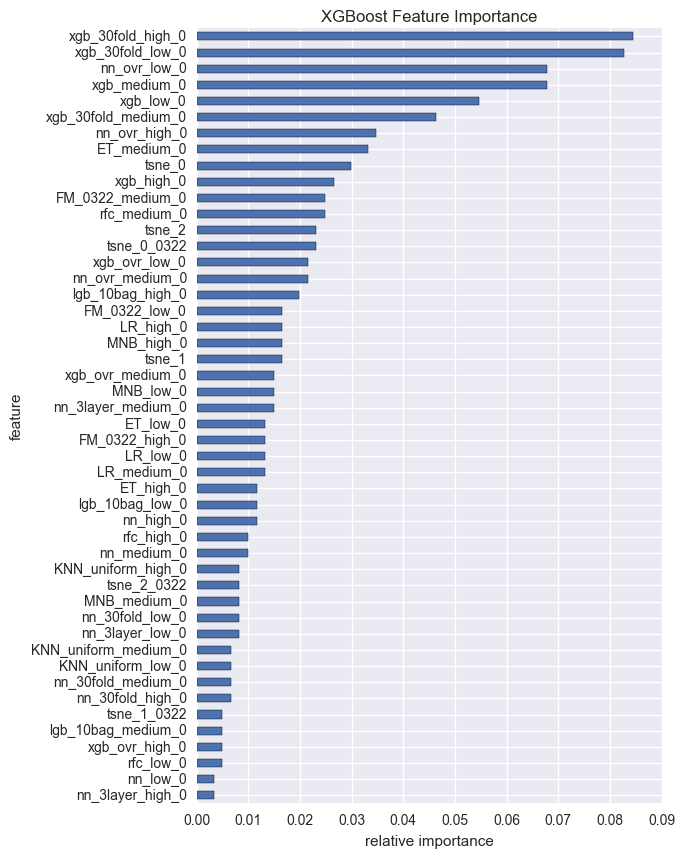

In [28]:
importance = np.vstack((X_train.columns, rgr.feature_importances_))
f_df = pd.DataFrame(importance.T, columns=['feature', 'fscore'])
f_df.fscore = f_df.fscore.astype('float64')
f_df = f_df.sort_values(by = 'fscore',ascending = True)
f_df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

In [29]:
train_X = train_2nd#[feature_to_use]
test_X = test_2nd_mean#[feature_to_use]

print train_X.shape
print test_X.shape

(49352, 48)
(74659, 48)


In [30]:
from bayes_opt import BayesianOptimization

In [47]:
best_score = 1000
for x in [3,4,5,6,7,8,9,10]:
    tmp = cv_train(train_X,train_y,max_depth = x)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[30]	train-mlogloss:0.48084+0.00043319	test-mlogloss:0.496305+0.00262536

3 	0.4963048
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[24]	train-mlogloss:0.472443+0.000509557	test-mlogloss:0.496981+0.00263186

4 	0.4969808
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[24]	train-mlogloss:0.452964+0.00101076	test-mlogloss:0.497828+0.0027074

5 	0.4978276
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[23]	train-mlogloss:0.427948+

In [49]:
for x in [1,2]:
    tmp = cv_train(train_X,train_y,max_depth = x)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[96]	train-mlogloss:0.488202+0.000661012	test-mlogloss:0.496315+0.00278589

1 	0.4963154
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[47]	train-mlogloss:0.484283+0.000734707	test-mlogloss:0.496238+0.00247492

2 	0.4962378


In [50]:
# max_depth = train_param
max_depth = train_param
print max_depth

2


In [51]:
train_param = 1
for x in [2,4,8,12,16,20,24,28,32,40,48,64,80,90,100,110,128]:
   
    tmp = cv_train(train_X,train_y,max_depth = max_depth,min_child_weight = x,early_stop = 20)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[48]	train-mlogloss:0.484161+0.000584401	test-mlogloss:0.49613+0.00256244

2 	0.4961304
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[46]	train-mlogloss:0.484692+0.000624706	test-mlogloss:0.496183+0.00257499

4 	0.4961828
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[43]	train-mlogloss:0.485467+0.000596002	test-mlogloss:0.496165+0.00256991

8 	0.496165
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[47]	train-mlogloss:0.48467

In [52]:
min_child_weight = train_param
print min_child_weight

16


In [53]:
train_param = 1
for x in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    tmp = cv_train(train_X,train_y,max_depth = max_depth,min_child_weight = min_child_weight, 
                   colsample_bytree = x,early_stop = 20)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[101]	train-mlogloss:0.479348+0.000900846	test-mlogloss:0.498983+0.00254008

0.1 	0.4989826
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[89]	train-mlogloss:0.479346+0.000799178	test-mlogloss:0.497295+0.00241012

0.2 	0.497295
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[44]	train-mlogloss:0.486734+0.000893595	test-mlogloss:0.497061+0.00236621

0.3 	0.4970606
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[44]	train-mlogloss

In [54]:
colsample_bytree = train_param
print colsample_bytree

0.9


In [55]:
train_param = 1
for x in [0.5,0.6,0.7,0.8,0.9]:
    tmp = cv_train(train_X,train_y,max_depth = max_depth,min_child_weight = min_child_weight, 
                   colsample_bytree = colsample_bytree, subsample = x,early_stop = 20)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[34]	train-mlogloss:0.488115+0.000764067	test-mlogloss:0.496135+0.0027814

0.5 	0.4961352
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[34]	train-mlogloss:0.487918+0.000763333	test-mlogloss:0.496345+0.00280002

0.6 	0.496345
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[34]	train-mlogloss:0.487689+0.000723061	test-mlogloss:0.496383+0.00236212

0.7 	0.4963828
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[34]	train-mlogloss:0

In [56]:
subsample = train_param
print subsample

1


In [57]:
train_param = 0
for x in [0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0]:
    tmp = cv_train(train_X,train_y,max_depth = max_depth,min_child_weight = min_child_weight, 
                   colsample_bytree = colsample_bytree, subsample = subsample, gamma = x,early_stop = 20)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[43]	train-mlogloss:0.485653+0.000651632	test-mlogloss:0.496+0.00253704

0.3 	0.4959998
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[44]	train-mlogloss:0.485432+0.000693691	test-mlogloss:0.496023+0.00259978

0.6 	0.4960232
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[37]	train-mlogloss:0.486993+0.000629189	test-mlogloss:0.496019+0.00259286

0.9 	0.496019
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[44]	train-mlogloss:0.4

In [58]:
gamma = train_param
print gamma

3.0


In [59]:
train_X.shape

(49352, 45)

In [35]:
xgtrain = xgb.DMatrix(train_X, label=train_y) 

def xgb_evaluate(min_child_weight, colsample_bytree, max_depth, subsample, gamma): #
    params = dict()
    params['objective']='multi:softprob'
    params['eval_metric']='mlogloss',
    params['num_class']=3
    params['silent']=1
    params['eta'] = 0.1
    params['verbose_eval'] = True
    params['min_child_weight'] = int(min_child_weight)
    params['colsample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['max_depth'] = int(max_depth)
    params['subsample'] = max(min(subsample, 1), 0)
    params['gamma'] = max(gamma, 0)
    
    cv_result = xgb.cv(
        params, xgtrain, 
        num_boost_round=10000, nfold=5,
        metrics = 'mlogloss',
        seed=1234,callbacks=[xgb.callback.early_stop(50,verbose=False)]
    )
    
    return -cv_result['test-mlogloss-mean'].values[-1]


xgb_BO = BayesianOptimization(
    xgb_evaluate, 
    {
        'max_depth': (2,5),
        'min_child_weight': (8,32),
        'colsample_bytree': (0.6,1),
        'subsample': (0.9,1),
        'gamma': (2,3.5)
    }
)

xgb_BO.maximize(init_points=10, n_iter=40)

Initialization
---------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
    1 | 00m39s |   -0.49555 |             0.8680 |    2.3194 |      2.7643 |            19.5185 |      0.9004 | 
    2 | 00m32s |   -0.49555 |             0.8267 |    2.0796 |      3.5348 |            30.0424 |      0.9085 | 
    3 | 00m31s |   -0.49577 |             0.6890 |    2.4503 |      3.4068 |            28.0035 |      0.9849 | 
    4 | 00m37s |   -0.49555 |             0.8958 |    2.6775 |      3.9050 |            22.1153 |      0.9049 | 
    5 | 00m31s |   -0.49567 |             0.8520 |    2.5386 |      2.4741 |            14.4536 |      0.9506 | 
    6 | 00m39s |   -0.49586 |             0.8542 |    2.0906 |      4.5151 |            14.6714 |      0.9481 | 
    7 | 00m32s |   -0.49568 |             0.8814 |    3.1398 |      2.1897 |      

E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.61342813e-05]), 'nit': 8, 'funcalls': 69}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.41845978e-05]), 'nit': 8, 'funcalls': 57}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
---------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00037539]), 'nit': 7, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00047092]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.02509803e-05]), 'nit': 7, 'funcalls': 53}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormal

   11 | 00m58s |   -0.49567 |             0.6510 |    2.5749 |      2.0859 |             8.2187 |      0.9208 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00038306]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)


   12 | 00m49s |   -0.49563 |             0.8099 |    3.2933 |      4.8511 |            31.8140 |      0.9691 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00051279]), 'nit': 9, 'funcalls': 59}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00258027]), 'nit': 6, 'funcalls': 56}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  7.00658129e-05]), 'nit': 8, 'funcalls': 75}
  " state: %s" % convergence_dict)


   13 | 00m38s |   -0.49579 |             0.6136 |    2.3862 |      2.0341 |            31.6993 |      0.9031 | 
   14 | 00m45s |   -0.49544 |             0.8004 |    3.4884 |      3.8224 |            29.9790 |      0.9061 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00326221]), 'nit': 7, 'funcalls': 53}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -6.43451422e-05]), 'nit': 8, 'funcalls': 56}
  " state: %s" % convergence_dict)


   15 | 00m46s |   -0.49578 |             0.7569 |    3.0928 |      4.3476 |            24.8132 |      0.9478 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0002096]), 'nit': 4, 'funcalls': 46}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -5.73527045e-05]), 'nit': 8, 'funcalls': 56}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -3.64832713e-05]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)


   16 | 00m53s |   -0.49557 |             0.8294 |    3.4177 |      4.7066 |             8.1467 |      0.9643 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00039547]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)


   17 | 00m48s |   -0.49569 |             0.9047 |    2.2393 |      2.2233 |            21.3569 |      0.9663 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00075149]), 'nit': 8, 'funcalls': 74}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  6.10865900e-05]), 'nit': 7, 'funcalls': 57}
  " state: %s" % convergence_dict)


   18 | 00m48s |   -0.49568 |             0.8347 |    3.1380 |      4.1737 |            30.8632 |      0.9132 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.28118918e-05]), 'nit': 8, 'funcalls': 55}
  " state: %s" % convergence_dict)


   19 | 00m47s |   -0.49564 |             0.7200 |    2.0236 |      4.7787 |             8.1833 |      0.9277 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00046212]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)


   20 | 00m48s |   -0.49565 |             0.7125 |    3.4869 |      2.0066 |            16.8926 |      0.9099 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00123812]), 'nit': 8, 'funcalls': 61}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00016364]), 'nit': 7, 'funcalls': 78}
  " state: %s" % convergence_dict)


   21 | 00m45s |   -0.49560 |             0.8235 |    3.0270 |      2.3641 |            12.1071 |      0.9004 | 
   22 | 00m45s |   -0.49578 |             0.7248 |    3.2664 |      4.2609 |            29.4066 |      0.9660 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00606258]), 'nit': 6, 'funcalls': 75}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00015736]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)


   23 | 00m47s |   -0.49576 |             0.7053 |    3.4460 |      4.9858 |            11.2069 |      0.9452 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00202173]), 'nit': 5, 'funcalls': 52}
  " state: %s" % convergence_dict)


   24 | 00m49s |   -0.49547 |             0.8061 |    3.3858 |      3.0715 |            31.9370 |      0.9075 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00015107]), 'nit': 9, 'funcalls': 68}
  " state: %s" % convergence_dict)


   25 | 00m45s |   -0.49545 |             0.8870 |    3.4247 |      3.1929 |            21.7550 |      0.9311 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  6.50007200e-05]), 'nit': 10, 'funcalls': 73}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -3.67972768e-05]), 'nit': 6, 'funcalls': 66}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00121786]), 'nit': 5, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated ab

   26 | 00m36s |   -0.49567 |             0.6055 |    3.4831 |      2.1683 |            27.2719 |      0.9432 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00982979]), 'nit': 7, 'funcalls': 54}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -5.74288570e-05]), 'nit': 7, 'funcalls': 77}
  " state: %s" % convergence_dict)


   27 | 00m43s |   -0.49565 |             0.8551 |    3.4426 |      2.2489 |            19.1470 |      0.9585 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00724407]), 'nit': 7, 'funcalls': 54}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00218936]), 'nit': 5, 'funcalls': 52}
  " state: %s" % convergence_dict)


   28 | 00m44s |   -0.49566 |             0.7697 |    3.3789 |      2.0815 |            17.7482 |      0.9773 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00318895]), 'nit': 4, 'funcalls': 55}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00178311]), 'nit': 5, 'funcalls': 49}
  " state: %s" % convergence_dict)


   29 | 00m51s |   -0.49571 |             0.6244 |    3.3679 |      2.6054 |            22.7811 |      0.9195 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00016532]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)


   30 | 00m40s |   -0.49553 |             0.8680 |    2.8894 |      3.2277 |            17.1902 |      0.9697 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00704542]), 'nit': 4, 'funcalls': 49}
  " state: %s" % convergence_dict)


   31 | 00m55s |   -0.49566 |             0.8530 |    3.3033 |      4.7762 |            20.5961 |      0.9189 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00170924]), 'nit': 5, 'funcalls': 52}
  " state: %s" % convergence_dict)


   32 | 00m51s |   -0.49558 |             0.8202 |    3.3198 |      4.9713 |             9.6092 |      0.9010 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.0032857]), 'nit': 8, 'funcalls': 94}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00353893]), 'nit': 5, 'funcalls': 49}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00212786]), 'nit': 5, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally wit

   33 | 00m45s |   -0.49562 |             0.9956 |    2.2791 |      3.4732 |            18.5400 |      0.9739 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00720903]), 'nit': 8, 'funcalls': 59}
  " state: %s" % convergence_dict)


   34 | 00m44s |   -0.49579 |             0.9920 |    2.0163 |      2.5941 |            10.5714 |      0.9749 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00012407]), 'nit': 7, 'funcalls': 73}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -4.26912447e-05]), 'nit': 8, 'funcalls': 55}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00259039]), 'nit': 6, 'funcalls': 71}
  " state: %s" % convergence_dict)


   35 | 00m48s |   -0.49567 |             0.8551 |    3.4234 |      3.6707 |            17.1510 |      0.9268 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00221874]), 'nit': 2, 'funcalls': 49}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -7.07996951e-05]), 'nit': 4, 'funcalls': 59}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00685453]), 'nit': 7, 'funcalls': 54}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormal

   36 | 00m50s |   -0.49559 |             0.9794 |    2.8120 |      3.6170 |            21.8309 |      0.9498 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.25572551e-05]), 'nit': 3, 'funcalls': 51}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.36708841e-05]), 'nit': 8, 'funcalls': 55}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00015083]), 'nit': 7, 'funcalls': 72}
  " state: %s" % convergence_dict)


   37 | 00m47s |   -0.49571 |             0.9804 |    2.2060 |      2.4032 |            17.4185 |      0.9695 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.82779822e-05]), 'nit': 9, 'funcalls': 68}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00032115]), 'nit': 8, 'funcalls': 87}
  " state: %s" % convergence_dict)


   38 | 00m40s |   -0.49571 |             0.6605 |    2.9604 |      2.4772 |            19.4404 |      0.9495 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00171263]), 'nit': 7, 'funcalls': 54}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.26262894e-05]), 'nit': 8, 'funcalls': 55}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.32943969e-05]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)


   39 | 00m49s |   -0.49561 |             0.8492 |    2.1312 |      3.4084 |            13.7532 |      0.9280 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00094664]), 'nit': 3, 'funcalls': 58}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00026956]), 'nit': 5, 'funcalls': 66}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  3.59227579e-05]), 'nit': 8, 'funcalls': 73}
  " state: %s" % convergence_dict)


   40 | 00m41s |   -0.49568 |             0.7942 |    3.1224 |      3.4001 |            18.0179 |      0.9328 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00042941]), 'nit': 3, 'funcalls': 58}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00628928]), 'nit': 5, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00765619]), 'nit': 5, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally wi

   41 | 00m52s |   -0.49566 |             0.9119 |    3.3300 |      2.4591 |            19.8358 |      0.9470 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00633777]), 'nit': 5, 'funcalls': 55}
  " state: %s" % convergence_dict)


   42 | 00m51s |   -0.49563 |             0.7948 |    3.4018 |      4.3659 |             8.5416 |      0.9543 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00021407]), 'nit': 6, 'funcalls': 63}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00030363]), 'nit': 4, 'funcalls': 48}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01022332]), 'nit': 6, 'funcalls': 50}
  " state: %s" % convergence_dict)


   43 | 00m44s |   -0.49576 |             0.7769 |    2.2641 |      2.4444 |            13.3545 |      0.9658 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.09623479e-05]), 'nit': 5, 'funcalls': 51}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.01356373]), 'nit': 4, 'funcalls': 49}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.44541960e-05]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)


   44 | 00m51s |   -0.49540 |             0.8424 |    3.3731 |      3.7131 |             8.1060 |      0.9212 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.19621400e-05]), 'nit': 7, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00013241]), 'nit': 6, 'funcalls': 67}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  3.69143672e-05]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)


   45 | 00m46s |   -0.49555 |             0.6022 |    2.6164 |      3.4693 |            18.9328 |      0.9800 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -8.39157183e-05]), 'nit': 9, 'funcalls': 74}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00026239]), 'nit': 4, 'funcalls': 48}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  7.78502945e-05]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)


   46 | 00m46s |   -0.49571 |             0.6804 |    3.1738 |      2.7184 |            20.4740 |      0.9297 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.56512251e-05]), 'nit': 4, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.50748126e-05]), 'nit': 9, 'funcalls': 73}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00231465]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)


   47 | 00m53s |   -0.49577 |             0.9496 |    2.0302 |      4.3879 |            21.5946 |      0.9414 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00012259]), 'nit': 7, 'funcalls': 60}
  " state: %s" % convergence_dict)


   48 | 00m56s |   -0.49571 |             0.9771 |    2.4997 |      4.6017 |            22.3338 |      0.9781 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.02188967e-05]), 'nit': 8, 'funcalls': 55}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -9.47550870e-05]), 'nit': 8, 'funcalls': 55}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.46827258e-05]), 'nit': 7, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminate

   49 | 00m46s |   -0.49569 |             0.9370 |    3.2965 |      2.2609 |             9.3786 |      0.9066 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00489945]), 'nit': 7, 'funcalls': 54}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00490663]), 'nit': 6, 'funcalls': 51}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  2.60634079e-05]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)


   50 | 00m43s |   -0.49553 |             0.7414 |    3.4709 |      3.5127 |            30.6550 |      0.9132 | 


In [36]:
xgb_bo_scores = pd.DataFrame([[s[0]['max_depth'],
                               s[0]['min_child_weight'],
                               s[0]['colsample_bytree'],
                               s[0]['subsample'],
                               s[0]['gamma'],
                               s[1]] for s in zip(xgb_BO.res['all']['params'],xgb_BO.res['all']['values'])],
                            columns = ['max_depth',
                                       'min_child_weight',
                                       'colsample_bytree',
                                       'subsample',
                                       'gamma',
                                       'score'])
xgb_bo_scores=xgb_bo_scores.sort_values('score',ascending=False)
xgb_bo_scores.head(10)

,max_depth,min_child_weight,colsample_bytree,subsample,gamma,score
33,3.713080,8.105961,0.842369,0.921247,3.373059,-0.495396
3,3.822425,29.979036,0.800354,0.906134,3.488371,-0.495440
14,3.192911,21.754977,0.886954,0.931054,3.424714,-0.495451
13,3.071529,31.936981,0.806074,0.907503,3.385753,-0.495469
19,3.227654,17.190151,0.867978,0.969744,2.889375,-0.495525
39,3.512691,30.655025,0.741366,0.913202,3.470907,-0.495529
34,3.469349,18.932811,0.602248,0.979988,2.616430,-0.495545
5,4.706588,8.146690,0.829436,0.964323,3.417694,-0.495571
21,4.971262,9.609215,0.820244,0.900968,3.319831,-0.495576
25,3.616950,21.830855,0.979441,0.949766,2.812011,-0.495588


In [37]:
def xgb_blend(estimators, train_x, train_y, test_x, fold, early_stopping_rounds=0,randomseed=1234):
    fold_start = time.time() 
    N_params = len(estimators)
#     print ("Blend %d estimators for %d folds" % (N_params, fold))
    skf = KFold(n_splits=fold,shuffle=True,random_state=randomseed)
    N_class = len(set(train_y))
        
    train_blend_x = np.zeros((train_x.shape[0], N_class*N_params))
    test_blend_x_mean = np.zeros((test_x.shape[0], N_class*N_params))
    test_blend_x_gmean = np.zeros((test_x.shape[0], N_class*N_params))
    scores = np.zeros ((fold,N_params))
    best_rounds = np.zeros ((fold, N_params))
    
    for j, est in enumerate(estimators):
        est.set_params(objective = 'multi:softprob')
        est.set_params(silent = False)
        est.set_params(learning_rate = 0.02)
        est.set_params(n_estimators=100000)
        
#         print ("Model %d: %s" %(j+1, est))

        test_blend_x_j = np.zeros((test_x.shape[0], N_class*fold))
    
        for i, (train_index, val_index) in enumerate(skf.split(train_x)):
#             print ("Model %d fold %d" %(j+1,i+1))
            
            train_x_fold = train_x.iloc[train_index]
            train_y_fold = train_y[train_index]
            val_x_fold = train_x.iloc[val_index]
            val_y_fold = train_y[val_index]      

            est.fit(train_x_fold,train_y_fold,
                    eval_set = [(val_x_fold, val_y_fold)],
                    eval_metric = 'mlogloss',
                    early_stopping_rounds=early_stopping_rounds,
                    verbose=False)
            best_round=est.best_iteration
            best_rounds[i,j]=best_round
#             print ("best round %d" % (best_round))
            val_y_predict_fold = est.predict_proba(val_x_fold,ntree_limit=best_round)
            score = log_loss(val_y_fold, val_y_predict_fold)
#             print "Score: ", score
            scores[i,j]=score
            train_blend_x[val_index, (j*N_class):(j+1)*N_class] = val_y_predict_fold
            
            test_blend_x_j[:,(i*N_class):(i+1)*N_class] = est.predict_proba(test_x,ntree_limit=best_round)
#             print ("Model %d fold %d fitting finished in %0.3fm" % (j+1,i+1, )
            
        test_blend_x_mean[:,(j*N_class):(j+1)*N_class] = \
                np.stack([test_blend_x_j[:,range(0,N_class*fold,N_class)].mean(1),
                          test_blend_x_j[:,range(1,N_class*fold,N_class)].mean(1),
                          test_blend_x_j[:,range(2,N_class*fold,N_class)].mean(1)]).T

            
#         print ("Score for model %d is %f" % (j+1,np.mean(scores[:,j])))
    print "Score models is %f fitting finished in %0.3fm" % (np.mean(scores),(time.time() - fold_start)/60)
    return (train_blend_x, test_blend_x_mean, test_blend_x_gmean, scores,best_rounds)


In [44]:
train_total = np.zeros((train_2nd.shape[0], 3))
test_total = np.zeros((test_2nd_mean.shape[0], 3))
name_train_blend = '../tmp/train_2ndxgb.csv'
name_test_blend = '../tmp/test_2ndxgb.csv'
score_total = 0
count = 100
print 'Starting ..........'
for n in range(count):
    randomseed = n
    estimators = [
                 xgb.XGBClassifier(max_depth = 3,
                                  min_child_weight = 8,
                                  colsample_bytree = 0.842369,
                                  subsample = 0.921247,
                                  gamma = 3.373059),  
                 ]
# 		max_depth	min_child_weight	colsample_bytree	subsample	gamma	score
# 33	3.713080	8.105961			0.842369			0.921247	3.373059	-0.495396

    (train_blend_x_xgb,
     test_blend_x_xgb_mean,
     test_blend_x_xgb_gmean,
     blend_scores_xgb,
     best_rounds_xgb) = xgb_blend(estimators,
                                  train_X,train_y,
                                  test_X,
                                  5,
                                  500,randomseed)
    train_total += train_blend_x_xgb
    test_total += test_blend_x_xgb_mean
    score_total += np.mean(blend_scores_xgb)

    np.savetxt(name_train_blend,train_total, delimiter=",")
    np.savetxt(name_test_blend,test_total, delimiter=",")
    
train_total = train_total / count
test_total = test_total / count
score_total = score_total / count

Starting ..........
Score models is 0.495626 fitting finished in 4.194m
Score models is 0.495445 fitting finished in 4.219m
Score models is 0.495475 fitting finished in 4.147m
Score models is 0.495606 fitting finished in 3.972m
Score models is 0.495194 fitting finished in 4.943m
Score models is 0.495419 fitting finished in 4.210m
Score models is 0.495324 fitting finished in 3.978m
Score models is 0.495432 fitting finished in 4.134m
Score models is 0.495394 fitting finished in 4.159m
Score models is 0.495242 fitting finished in 4.723m
Score models is 0.495334 fitting finished in 4.464m
Score models is 0.495321 fitting finished in 4.293m
Score models is 0.495436 fitting finished in 4.284m
Score models is 0.495127 fitting finished in 4.917m
Score models is 0.495142 fitting finished in 4.864m
Score models is 0.495471 fitting finished in 4.405m
Score models is 0.495478 fitting finished in 4.551m
Score models is 0.495632 fitting finished in 4.406m
Score models is 0.495320 fitting finished in

In [45]:
now = datetime.now()

name_train_blend = '../blend/train_blend_2ndXGB_BM_100bagging_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'
name_test_blend_mean = '../blend/test_blend_2ndXGB_BM_100bagging_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'


print score_total
# print (np.mean(best_rounds_RFC,axis=0))
np.savetxt(name_train_blend,train_total, delimiter=",")
np.savetxt(name_test_blend_mean,test_total, delimiter=",")

0.495396755381


In [46]:
# now = datetime.now()
data_path = "../input/"
test_X_0322 = pd.read_csv(data_path + 'test_BM_MB_add03052240.csv')

sub_name = '../output/sub_2ndXGB_last_100bagging_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'

out_df = pd.DataFrame(test_total[:,:3])
out_df.columns = ["low", "medium", "high"]
out_df["listing_id"] = test_X_0322.listing_id.values
out_df.to_csv(sub_name, index=False)

In [47]:
train_total = np.zeros((train_2nd.shape[0], 3))
test_total = np.zeros((test_2nd_mean.shape[0], 3))
name_train_blend = '../tmp/train_2ndxgb_1.csv'
name_test_blend = '../tmp/test_2ndxgb_1.csv'
score_total = 0
count = 100
print 'Starting ..........'
for n in range(count):
    randomseed = n+5134
    estimators = [
                 xgb.XGBClassifier(max_depth = 3,
                                  min_child_weight = 8,
                                  colsample_bytree = 0.842369,
                                  subsample = 0.921247,
                                  gamma = 3.373059),  
                 ]
# 		max_depth	min_child_weight	colsample_bytree	subsample	gamma	score
# 33	3.713080	8.105961			0.842369			0.921247	3.373059	-0.495396

    (train_blend_x_xgb,
     test_blend_x_xgb_mean,
     test_blend_x_xgb_gmean,
     blend_scores_xgb,
     best_rounds_xgb) = xgb_blend(estimators,
                                  train_X,train_y,
                                  test_X,
                                  5,
                                  500,randomseed)
    train_total += train_blend_x_xgb
    test_total += test_blend_x_xgb_mean
    score_total += np.mean(blend_scores_xgb)

    np.savetxt(name_train_blend,train_total, delimiter=",")
    np.savetxt(name_test_blend,test_total, delimiter=",")
    
train_total = train_total / count
test_total = test_total / count
score_total = score_total / count

Starting ..........
Score models is 0.495135 fitting finished in 4.417m
Score models is 0.495416 fitting finished in 4.393m
Score models is 0.495358 fitting finished in 4.665m
Score models is 0.495353 fitting finished in 4.598m
Score models is 0.495705 fitting finished in 3.987m
Score models is 0.495184 fitting finished in 4.413m
Score models is 0.495601 fitting finished in 4.239m
Score models is 0.495285 fitting finished in 4.350m
Score models is 0.495631 fitting finished in 3.979m
Score models is 0.495468 fitting finished in 4.301m
Score models is 0.495275 fitting finished in 4.318m
Score models is 0.495156 fitting finished in 4.239m
Score models is 0.495530 fitting finished in 4.139m
Score models is 0.495119 fitting finished in 4.617m
Score models is 0.495025 fitting finished in 4.506m
Score models is 0.495458 fitting finished in 4.534m
Score models is 0.495558 fitting finished in 4.211m
Score models is 0.495638 fitting finished in 4.653m
Score models is 0.495296 fitting finished in

In [48]:
now = datetime.now()

name_train_blend = '../blend/train_blend_2ndXGB_BM_100bagging_1_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'
name_test_blend_mean = '../blend/test_blend_2ndXGB_BM_100bagging_1_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'


print score_total
# print (np.mean(best_rounds_RFC,axis=0))
np.savetxt(name_train_blend,train_total, delimiter=",")
np.savetxt(name_test_blend_mean,test_total, delimiter=",")

0.495332943676


In [49]:
# now = datetime.now()
data_path = "../input/"
test_X_0322 = pd.read_csv(data_path + 'test_BM_MB_add03052240.csv')

sub_name = '../output/sub_2ndXGB_last_100bagging_1_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'

out_df = pd.DataFrame(test_total)
out_df.columns = ["low", "medium", "high"]
out_df["listing_id"] = test_X_0322.listing_id.values
out_df.to_csv(sub_name, index=False)

In [ ]:
# sub_2ndXGB_last_test   0.495539